In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

# train_df = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
# test_df =  pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")
train_df = pd.read_csv("train.csv")
test_df =  pd.read_csv("test.csv")


In [2]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
print("原數據機集中的異常值/空值")
train_df.isnull().sum()

原數據機集中的異常值/空值


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [4]:
# 填充異常值
train_df.fillna(method='bfill',axis=0,inplace=True)

<AxesSubplot:>

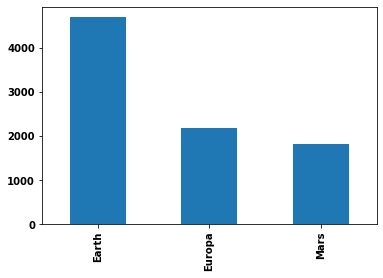

In [5]:
HomePlant = train_df['HomePlanet']
HomePlant.value_counts().plot(kind='bar')

In [6]:
cabin = train_df['Cabin']
cabin.value_counts() # pass this attributes

G/734/S     8
F/1194/P    8
C/21/P      7
D/176/S     7
C/42/P      7
           ..
D/39/P      1
F/1414/P    1
G/1124/S    1
G/1463/P    1
F/1117/P    1
Name: Cabin, Length: 6560, dtype: int64

In [7]:
train_df['CryoSleep'].value_counts()


False    5569
True     3124
Name: CryoSleep, dtype: int64

In [8]:
train_df['Destination'].value_counts()

TRAPPIST-1e      6041
55 Cancri e      1836
PSO J318.5-22     816
Name: Destination, dtype: int64

In [9]:
print(train_df['Age'].value_counts())


18.0    328
24.0    326
21.0    313
22.0    303
23.0    300
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: Age, Length: 80, dtype: int64


In [10]:
print(train_df['VIP'].value_counts())


False    8491
True      202
Name: VIP, dtype: int64


In [11]:
print(train_df['RoomService'].value_counts())


0.0       5697
1.0        119
2.0         80
3.0         62
4.0         48
          ... 
1973.0       1
782.0        1
950.0        1
658.0        1
1174.0       1
Name: RoomService, Length: 1273, dtype: int64


In [12]:
print(train_df['FoodCourt'].value_counts())


0.0       5574
1.0        118
2.0         76
4.0         54
3.0         53
          ... 
3070.0       1
1170.0       1
627.0        1
1719.0       1
1174.0       1
Name: FoodCourt, Length: 1507, dtype: int64


In [13]:
print(train_df['ShoppingMall'].value_counts())


0.0       5727
1.0        157
2.0         81
3.0         60
4.0         45
          ... 
2728.0       1
396.0        1
2315.0       1
326.0        1
620.0        1
Name: ShoppingMall, Length: 1115, dtype: int64


In [14]:
print(train_df['Spa'].value_counts())


0.0       5435
1.0        152
2.0        108
3.0         54
5.0         53
          ... 
5432.0       1
4864.0       1
2043.0       1
3803.0       1
1159.0       1
Name: Spa, Length: 1327, dtype: int64


In [15]:
print(train_df['VRDeck'].value_counts())


0.0       5623
1.0        140
2.0         72
3.0         57
5.0         51
          ... 
3173.0       1
3726.0       1
519.0        1
1467.0       1
1174.0       1
Name: VRDeck, Length: 1306, dtype: int64


**x的數據集屬性有id,HomePlanet,CryoSleep,Destination,Age**

In [16]:
''' 
查看年紀和存活率有沒有相關性
使用的是皮爾遜相關係數
''' 

age = train_df['Age']
transported = train_df['Transported']
# print(age.shape,transported.shape)
# 負相關，一個變量的值越小另一個變量的值反而越小
print(age.corr(transported))



-0.07189101830149841


In [17]:
# print("空值有",age.isnull().sum())
# # 使用fillna補充空值
# # bfill 空值取前一個
# age.fillna(method='bfill',axis=0,inplace=True)
# print("空值有",age.isnull().sum())
from scipy.stats import pearsonr
coef,p = pearsonr(age,transported)
print(coef,p)

alpha = 0.4
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)


-0.07189101830149856 1.9386629123367487e-11
Samples are correlated (reject H0) p=0.000


In [18]:
print("空值有",age.isnull().sum())
# 使用fillna補充空值
# bfill 空值取前一個
age.fillna(method='bfill',axis=0,inplace=True)
print("空值有",age.isnull().sum())
from scipy.stats import pearsonr
coef,p = pearsonr(age,transported)

alpha = 0.4
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)


空值有 0
空值有 0
Samples are correlated (reject H0) p=0.000


In [19]:
'''使用斯皮尔曼秩相关系数再次計算age之間的相關性'''

from scipy.stats import spearmanr
coef,p = spearmanr(age,transported)
print(coef,p)
alpha = 0.05 

if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

-0.06722130922718975 3.526609955857696e-10
Samples are correlated (reject H0) p=0.000


In [20]:
'''使用肯德尔秩相关系数再次計算age之間的相關性'''

from scipy.stats import kendalltau
coef,p = kendalltau(age,transported)
print(coef,p)
alpha = 0.05 

if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

-0.055482225267958575 3.678271028780784e-10
Samples are correlated (reject H0) p=0.000


In [21]:
# x1 = [12, 2, 1, 12, 2]
# x2 = [1, 4, 7, 1, 0]
# coef,p = kendalltau(x1, x2)
# print(coef,p)

In [22]:
def cal_corr(df1,df2):
    #接近 1 的值表示強烈同意，接近 -1 的值表示強烈不同意。
    coef,p = kendalltau(df1,df2)
    print(coef,p)
    alpha = 1
        
    if p >alpha:
        print(f'{df1}and{df2}Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
    else:
        print('Samples are correlated (reject H0) p=%.3f' % p)
    

In [23]:
cal_corr(train_df['VIP'],transported)

-0.03471549295975782 0.0012098126593006755
Samples are correlated (reject H0) p=0.001


In [24]:
cal_corr(train_df['Age'],transported)

-0.055482225267958575 3.678271028780784e-10
Samples are correlated (reject H0) p=0.000


In [25]:
cal_corr(train_df['Spa'],transported)

-0.33130465175614876 1.5461784052437595e-252
Samples are correlated (reject H0) p=0.000


In [26]:
type(train_df)

pandas.core.frame.DataFrame

In [27]:
# 选取x的訓練集有PassengerId,HomePlanet,CryoSleep,Destination,Age,
# y為對應的Transported
X = train_df[
    ['PassengerId','HomePlanet','CryoSleep','Destination','Age']
]
# 不添加id的屬性，解決。。。屬性類型不匹配的問題
X = train_df[
    ['HomePlanet','CryoSleep','Destination','Age']
]
X.head()
# 因為要額外處理字符串的數值，所以不適用這種直接從母pd擷取的方法



,HomePlanet,CryoSleep,Destination,Age
0,Europa,False,TRAPPIST-1e,39.0
1,Earth,False,TRAPPIST-1e,24.0
2,Europa,False,TRAPPIST-1e,58.0
3,Europa,False,TRAPPIST-1e,33.0
4,Earth,False,TRAPPIST-1e,16.0


> 模型訓練過程中：
> <br> **ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type bool).** <br>

解決方法：
1. 需要將TrueFalse轉換成01
2. ~~將字符串需要轉換為特徵向量~~ 將字符串影射到數字


In [28]:
# version-2 --直接把對應的字符串更改為數字

X.head()

,HomePlanet,CryoSleep,Destination,Age
0,Europa,False,TRAPPIST-1e,39.0
1,Earth,False,TRAPPIST-1e,24.0
2,Europa,False,TRAPPIST-1e,58.0
3,Europa,False,TRAPPIST-1e,33.0
4,Earth,False,TRAPPIST-1e,16.0


In [29]:
HomePlanet2Int = {
    'Europa':1,
    'Earth':2,
    "Mars":3,
    # 解決空數值的問題
    # "NaN":4 沒辦法刪除元素，直接用fillna
}
X['HomePlanet'] = X['HomePlanet'].map(HomePlanet2Int)
X.head()

/var/folders/95/0b9jlx8d4dgdp4pw27fwrd440000gn/T/ipykernel_5805/172427832.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['HomePlanet'] = X['HomePlanet'].map(HomePlanet2Int)


,HomePlanet,CryoSleep,Destination,Age
0,1,False,TRAPPIST-1e,39.0
1,2,False,TRAPPIST-1e,24.0
2,1,False,TRAPPIST-1e,58.0
3,1,False,TRAPPIST-1e,33.0
4,2,False,TRAPPIST-1e,16.0


In [30]:
print(X['Destination'].unique())
Destination2Int = {
    'TRAPPIST-1e':1,
    'PSO J318.5-22':2,
    "55 Cancri e":3
    # nan:4
}
X['Destination'] = X['Destination'].map(Destination2Int)
X.head()

['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']


/var/folders/95/0b9jlx8d4dgdp4pw27fwrd440000gn/T/ipykernel_5805/3141475257.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Destination'] = X['Destination'].map(Destination2Int)


,HomePlanet,CryoSleep,Destination,Age
0,1,False,1,39.0
1,2,False,1,24.0
2,1,False,1,58.0
3,1,False,1,33.0
4,2,False,1,16.0


In [31]:
CryoSleep2Int = {
    True:0,
    False:1
}
X['CryoSleep'] = X['CryoSleep'].map(CryoSleep2Int)
X.head()

/var/folders/95/0b9jlx8d4dgdp4pw27fwrd440000gn/T/ipykernel_5805/2752589966.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['CryoSleep'] = X['CryoSleep'].map(CryoSleep2Int)


,HomePlanet,CryoSleep,Destination,Age
0,1,1,1,39.0
1,2,1,1,24.0
2,1,1,1,58.0
3,1,1,1,33.0
4,2,1,1,16.0


In [32]:
X.isna().sum()

HomePlanet     0
CryoSleep      0
Destination    0
Age            0
dtype: int64

**ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).**

In [33]:
X['HomePlanet']= X['HomePlanet'].fillna(-1)

/var/folders/95/0b9jlx8d4dgdp4pw27fwrd440000gn/T/ipykernel_5805/1715115631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['HomePlanet']= X['HomePlanet'].fillna(-1)


In [34]:
X.isna().sum()

HomePlanet     0
CryoSleep      0
Destination    0
Age            0
dtype: int64

In [35]:
print(X.dtypes)
X['HomePlanet']  = X['HomePlanet'].astype(np.int64)

X['Age']  = X['Age'].astype(np.int64)
print(X.dtypes)

HomePlanet       int64
CryoSleep        int64
Destination      int64
Age            float64
dtype: object
HomePlanet     int64
CryoSleep      int64
Destination    int64
Age            int64
dtype: object


/var/folders/95/0b9jlx8d4dgdp4pw27fwrd440000gn/T/ipykernel_5805/142278385.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['HomePlanet']  = X['HomePlanet'].astype(np.int64)
/var/folders/95/0b9jlx8d4dgdp4pw27fwrd440000gn/T/ipykernel_5805/142278385.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age']  = X['Age'].astype(np.int64)


In [36]:
X['HomePlanet'].value_counts()

2    4697
1    2184
3    1812
Name: HomePlanet, dtype: int64

X['HomePlanet'] = X['HomePlanet'].map(HomePlanet2Int)

**ValueError: Cannot convert non-finite values (NA or inf) to integer**

In [37]:
# '''~~先查看不同屬性中字符串的分類~~'''
# cryoSleep = train_df['CryoSleep'].astype(int)
# cryoSleep.head()

In [38]:
# # train_df['Destination'].value_counts().plot(kind='bar')

# destination= train_df['Destination']
# destination.head()

In [39]:
# # destination = pd.Categorical(destination).codes
# # from keras.utils import to_categorical
# from tensorflow.keras.utils import to_categorical
# train_df['Destination'] = pd.Categorical(train_df['Destination']).codes
# destination = to_categorical(train_df['Destination'])
# print("destination",destination)

# # X = pd.Categorical(X).codes
# # X = to_categorical(X)
# # print(X)
# # HomePlant = pd.Categorical(train_df['HomePlanet']).codes
# # print('HomePlanet',HomePlant)


In [40]:
# # X = pd.DataFrame([
# #     [train_df['Age'],HomePlant,destination,cryoSleep],
# # ])
# X = pd.DataFrame([
#     [train_df['Age'],destination],
# ])
# X.head()

In [41]:
Y = train_df[
    ['Transported']
]
Y.head()

,Transported
0,False
1,True
2,False
3,False
4,True


> 模型訓練過程中：
> <br> **ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type bool).** <br>
解決方法：需要將TrueFalse轉換成01


In [42]:
Y = Y.astype(int)
Y.head()

,Transported
0,0
1,1
2,0
3,0
4,1


In [43]:
print(X.dtypes)
print("----")
print(Y.dtypes)

HomePlanet     int64
CryoSleep      int64
Destination    int64
Age            int64
dtype: object
----
Transported    int64
dtype: object


In [44]:
# X = np.asarray(X).astype(object)
# Y = np.asarray(X).astype(object)

In [45]:
# print(X.astype)
# print("----")
# print(Y.astype)

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(6519, 4) (2174, 4) (6519, 1) (2174, 1)


In [47]:
input_shape = x_train.shape[1]
output_shape = y_train.shape[1]
print(input_shape,output_shape)

4 1


In [48]:
def train_val_plot(history):
  fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,5))
  
  # acc
  ax1.plot(range(1,len(history.history['acc'])+1),history.history['acc'])
  ax1.plot(range(1, len(history.history['val_acc']) + 1), history.history['val_acc'])
  ax1.set_title('History of Accuracy')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('Accuracy')
  ax1.legend(['training', 'validation'])
  # loss 
  ax2.plot(range(1,len(history.history['loss'])+1),history.history['loss'])
  ax2.plot(range(1, len(history.history['val_loss']) + 1), history.history['val_loss'])
  ax2.set_title('History of Loss')
  ax2.set_xlabel('Epochs')
  ax2.set_ylabel('Loss')
  ax2.legend(['training', 'validation'])
  # final show 
  plt.show()


構建模型

In [49]:
from tensorflow.keras.layers import Dense,Input,Dropout,LSTM
from tensorflow.keras.models import Sequential
import tensorflow as tf 

model = Sequential()
model.add(Input(shape=input_shape))

model.add(Dense(units=32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=64,activation='relu',))
model.add(Dense(units=16,activation='relu',))
model.add(Dropout(0.2))
model.add(Dense(output_shape,activation='sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 16)                1040      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,329
Trainable params: 3,329
Non-trainabl

2023-01-30 16:29:00.063400: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [50]:
# model.compile(optimizer='adam',loss='mean_squared_error',metrics=['acc'])
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['acc'])


Epoch 1/50
102/102 [==============================] - 1s 3ms/step - loss: 0.2652 - acc: 0.5393 - val_loss: 0.2394 - val_acc: 0.6099
Epoch 2/50
102/102 [==============================] - 0s 1ms/step - loss: 0.2399 - acc: 0.5848 - val_loss: 0.2271 - val_acc: 0.6996
Epoch 3/50
102/102 [==============================] - 0s 1ms/step - loss: 0.2232 - acc: 0.6518 - val_loss: 0.2037 - val_acc: 0.6946
Epoch 4/50
102/102 [==============================] - 0s 1ms/step - loss: 0.2111 - acc: 0.6825 - val_loss: 0.1969 - val_acc: 0.7203
Epoch 5/50
102/102 [==============================] - 0s 1ms/step - loss: 0.2059 - acc: 0.7039 - val_loss: 0.1959 - val_acc: 0.7231
Epoch 6/50
102/102 [==============================] - 0s 1ms/step - loss: 0.1989 - acc: 0.7184 - val_loss: 0.1948 - val_acc: 0.7199
Epoch 7/50
102/102 [==============================] - 0s 1ms/step - loss: 0.1990 - acc: 0.7210 - val_loss: 0.1935 - val_acc: 0.7236
Epoch 8/50
102/102 [==============================] - 0s 1ms/step - loss: 0.

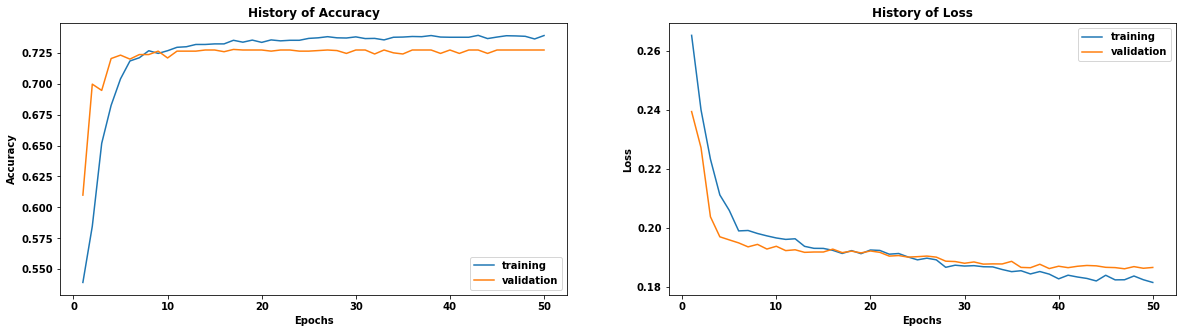

最後精度 0.7389169931411743


In [51]:
history =model.fit(x = x_train,y = y_train,batch_size=64,epochs=50,shuffle=True,validation_data=(x_test,y_test))
train_val_plot(history)
print("最後精度",history.history['acc'][-1])

In [52]:
y_pred = model.predict(x_test)

print(y_pred.shape,y_test.shape)

(2174, 1) (2174, 1)


In [53]:
y_true =np.array(y_test['Transported']).astype(np.float32)

In [54]:
y_true

array([0., 1., 0., ..., 1., 0., 0.], dtype=float32)

In [55]:
# 超過50活-1，
y_pred = np.where(y_pred >0.5,1,0)
# type(y_pred)

**ValueError: Classification metrics can't handle a mix of binary and continuous targets**

In [56]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_true,y_pred)

In [57]:
score

0.7272309107635695

對test進行預測

In [58]:
# 在對test_df進行預測的時候，需要對部分的數據進行改變，以適應模型輸入
id = test_df['PassengerId']
sub_x = test_df[
    ['HomePlanet','CryoSleep','Destination','Age']
]
sub_x.isna().sum()

HomePlanet     87
CryoSleep      93
Destination    92
Age            91
dtype: int64

In [59]:
sub_x.head()

,HomePlanet,CryoSleep,Destination,Age
0,Earth,True,TRAPPIST-1e,27.0
1,Earth,False,TRAPPIST-1e,19.0
2,Europa,True,55 Cancri e,31.0
3,Europa,False,TRAPPIST-1e,38.0
4,Earth,False,TRAPPIST-1e,20.0


<AxesSubplot:>

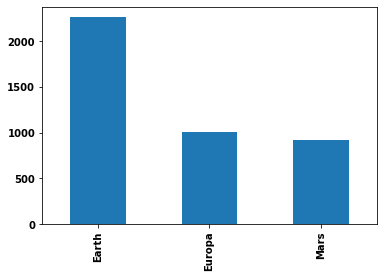

In [60]:
sub_x['HomePlanet'].value_counts().plot(kind='bar')

In [61]:
sub_x['HomePlanet'] = sub_x['HomePlanet'].map(HomePlanet2Int)

/var/folders/95/0b9jlx8d4dgdp4pw27fwrd440000gn/T/ipykernel_5805/1172649309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_x['HomePlanet'] = sub_x['HomePlanet'].map(HomePlanet2Int)


In [62]:
sub_x['CryoSleep'] = sub_x['CryoSleep'].map(CryoSleep2Int)


/var/folders/95/0b9jlx8d4dgdp4pw27fwrd440000gn/T/ipykernel_5805/1291619727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_x['CryoSleep'] = sub_x['CryoSleep'].map(CryoSleep2Int)


<AxesSubplot:>

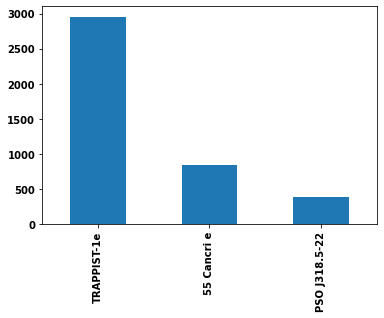

In [63]:
sub_x['Destination'].value_counts().plot(kind='bar')

In [64]:
sub_x['Destination'].unique()

array(['TRAPPIST-1e', '55 Cancri e', 'PSO J318.5-22', nan], dtype=object)

In [65]:
sub_x['Destination'] = sub_x['Destination'].map(Destination2Int)
sub_x.fillna(-1)# nan=-1

/var/folders/95/0b9jlx8d4dgdp4pw27fwrd440000gn/T/ipykernel_5805/4050107730.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_x['Destination'] = sub_x['Destination'].map(Destination2Int)


,HomePlanet,CryoSleep,Destination,Age
0,2.0,0.0,1.0,27.0
1,2.0,1.0,1.0,19.0
2,1.0,0.0,3.0,31.0
3,1.0,1.0,1.0,38.0
4,2.0,1.0,1.0,20.0
...,...,...,...,...
4272,2.0,0.0,1.0,34.0
4273,2.0,1.0,1.0,42.0
4274,3.0,0.0,3.0,-1.0
4275,1.0,1.0,-1.0,-1.0


In [67]:
sub_x.head()

,HomePlanet,CryoSleep,Destination,Age
0,2.0,0.0,1.0,27.0
1,2.0,1.0,1.0,19.0
2,1.0,0.0,3.0,31.0
3,1.0,1.0,1.0,38.0
4,2.0,1.0,1.0,20.0


In [70]:
sub_pred = model.predict(sub_x)

In [73]:
sub_pred = np.where(sub_pred>0.5,1,0)
sub_pred

array([[1],
       [0],
       [1],
       ...,
       [0],
       [0],
       [1]])

In [74]:
type(sub_pred),type(test_df['PassengerId'])

(numpy.ndarray, pandas.core.series.Series)

In [109]:
sub_pred = np.where(sub_pred==1,True,False)

In [110]:
sub_pred_pd = pd.DataFrame(sub_pred,columns=['Transported'])


# sub_pred_pd = sub_pred_pd.rdd.map(CryoSleep2Int)
sub_pred_pd

,Transported
0,True
1,False
2,True
3,False
4,False
...,...
4272,True
4273,False
4274,False
4275,False


In [111]:
sub_pred_pd_id = pd.DataFrame(test_df['PassengerId'])
sub_pred_pd_id

,PassengerId
0,0013_01
1,0018_01
2,0019_01
3,0021_01
4,0023_01
...,...
4272,9266_02
4273,9269_01
4274,9271_01
4275,9273_01


In [96]:
# test_df['PassengerId'].isna().count()
# test_df['PassengerId'] = test_df['PassengerId'].fillna("0000_00")

In [97]:
# test_df['PassengerId'].isna().count()

4277

重新组合没问题，需要去除空白值-NaN


In [114]:
sub_pred_pd_id.isnull().count()

PassengerId    4277
dtype: int64

In [115]:
sub_pred_pd.isnull().count()

Transported    4277
dtype: int64

In [116]:
type(sub_pred_pd),type(sub_pred_pd_id)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [112]:
sub_final = pd.concat([sub_pred_pd_id,sub_pred_pd])

sub_final

,PassengerId,Transported
0,0013_01,NaN
1,0018_01,NaN
2,0019_01,NaN
3,0021_01,NaN
4,0023_01,NaN
...,...,...
4272,NaN,True
4273,NaN,False
4274,NaN,False
4275,NaN,False


In [113]:
sub_final = sub_final.dropna()
sub_final

,PassengerId,Transported


In [105]:
sub_final.to_csv('sub_pred.csv')